**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})

In [ ]:
import plotly.express as px
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

**Loading Dataset**

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/Fraud/fraudTest.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Fraud/fraudTest.csv")

In [ ]:
train_data.info(),test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

In [ ]:
train_data.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
train_data.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
print(train_data['is_fraud'].value_counts())


is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [ ]:
train_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


<ipython-input-24-a9e513329a56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(x='is_fraud',data=train_data,palette="pastel")


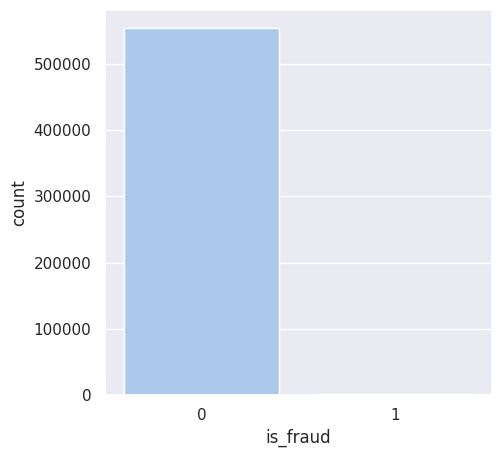

In [ ]:
plt.figure(figsize=(5,5))
fg=sns.countplot(x='is_fraud',data=train_data,palette="pastel")
plt.show(fg)

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

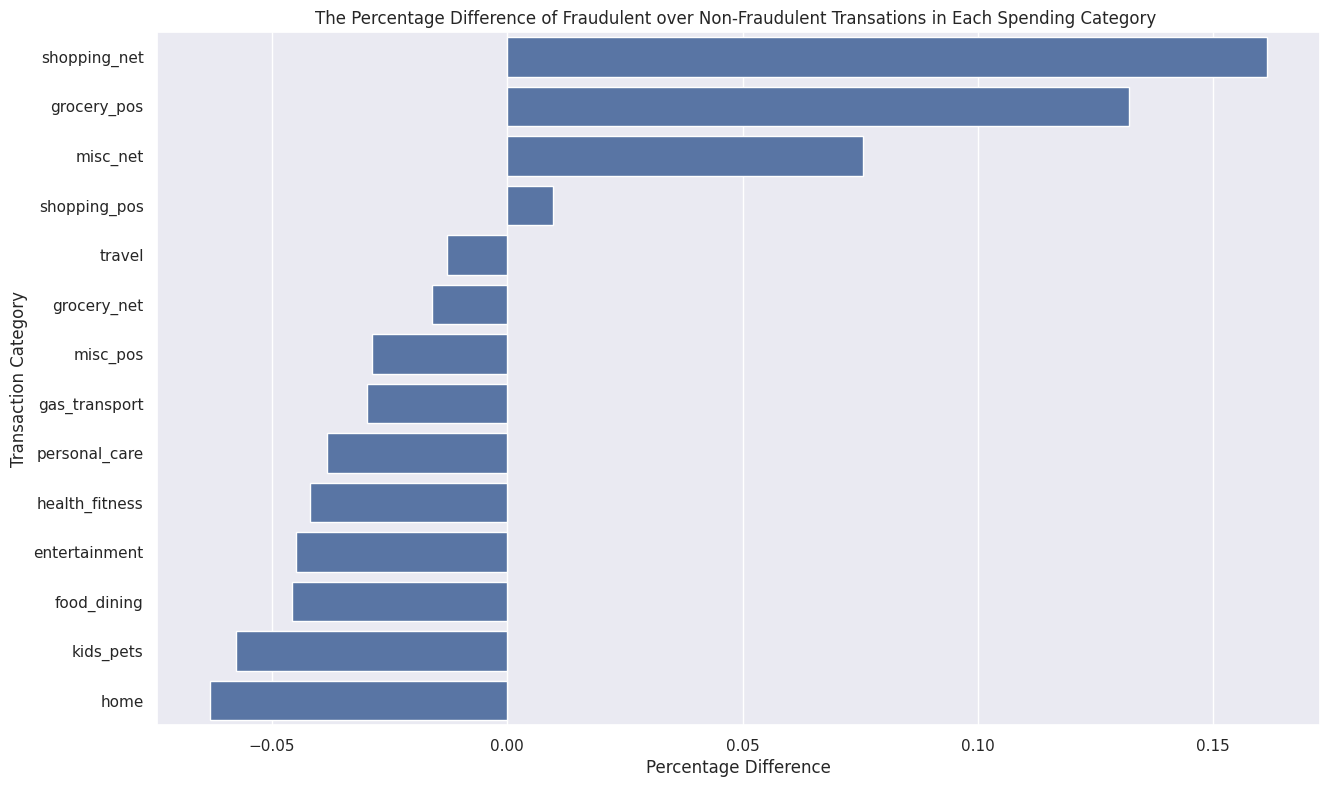

In [ ]:
a=train_data[train_data['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=train_data[train_data['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

**Preprocessing**

In [ ]:
train_data["trans_date_trans_time"]=pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"]=pd.to_datetime(train_data["dob"])
train_data

test_data["trans_date_trans_time"]=pd.to_datetime(test_data["trans_date_trans_time"])
test_data["dob"]=pd.to_datetime(test_data["dob"])
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


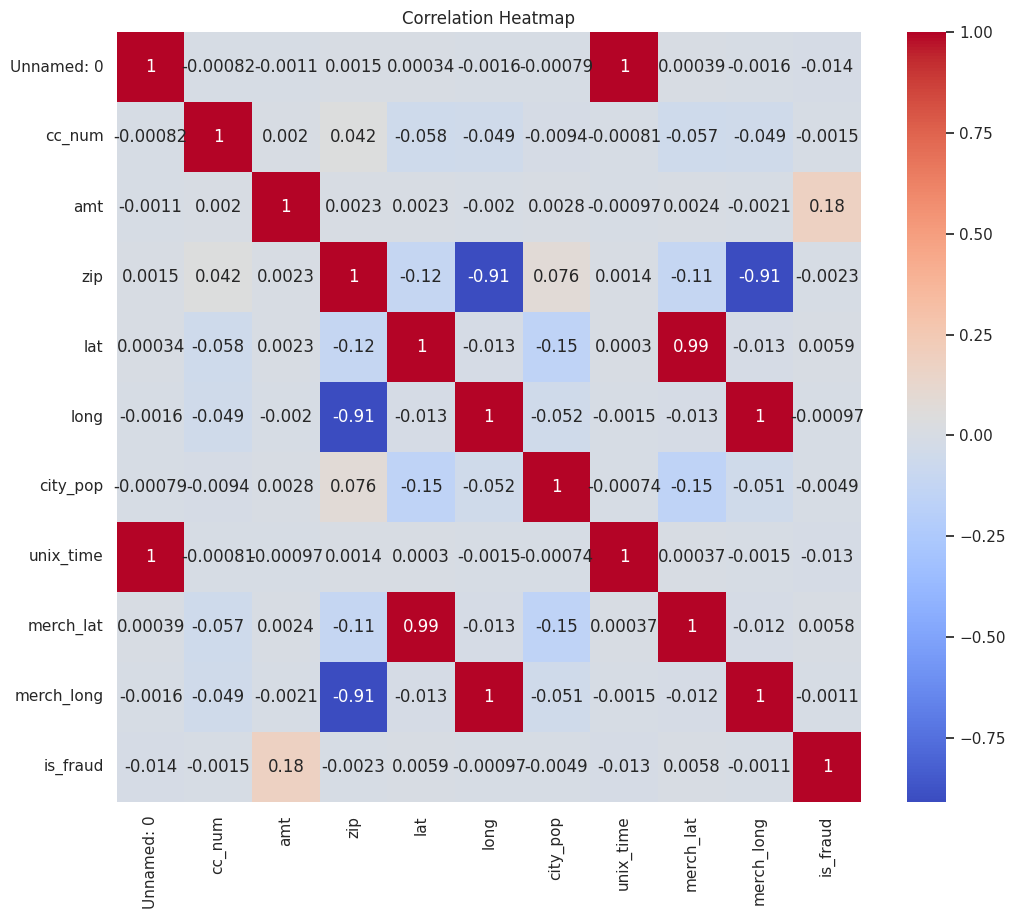

In [ ]:
# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=np.number)

# Calculate correlation
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#drop columns that are not relevant to predicy fraud transaction
drop_columns = ['Unnamed: 0','cc_num','trans_num','unix_time',
               'first','last','street','zip','trans_date_trans_time','city',
               'lat','long','dob','merch_lat','merch_long','state']
train_data.drop(columns=drop_columns,inplace=True)
test_data.drop(columns=drop_columns,inplace=True)

print(train_data)
train_data.shape

print(test_data.head(5))
test_data.shape

                                    merchant        category     amt gender  \
0                      fraud_Kirlin and Sons   personal_care    2.86      M   
1                       fraud_Sporer-Keebler   personal_care   29.84      F   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                          fraud_Haley Group        misc_pos   60.05      M   
4                      fraud_Johnston-Casper          travel    3.19      M   
...                                      ...             ...     ...    ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77      M   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                       fraud_Rau-Robel       kids_pets   86.88      F   
555717                 fraud_Breitenberg LLC          travel    7.99      M   
555718                     fraud_Dare-Marvin   entertainment   38.13      M   

        city_pop                     job  is_fraud 

(555719, 7)

**Data Handling**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_data["gender"]=encoder.fit_transform(train_data["gender"])
test_data["gender"]=encoder.fit_transform(test_data["gender"])

train_data["category"]=encoder.fit_transform(train_data["category"])
test_data["category"]=encoder.fit_transform(test_data["category"])

train_data["job"]=encoder.fit_transform(train_data["job"])
test_data["job"]=encoder.fit_transform(test_data["job"])

train_data["merchant"]=encoder.fit_transform(train_data["merchant"])
test_data["merchant"]=encoder.fit_transform(test_data["merchant"])
# Assuming your DataFrame is named df
train_data['amt'] = train_data['amt'].astype(int)

# Fill missing values
train_data.fillna(-999, inplace=True)
test_data.fillna(-999, inplace=True)
test_data.fillna(-999,inplace=True)
test_data.fillna(-999,inplace=True)

# Drop rows containing -999 in train_data
train_data = train_data[train_data != -999].dropna()

# Drop rows containing -999 in test_data
test_data = test_data[test_data != -999].dropna()


**Train Test Split**

In [ ]:
x_train = train_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']

x_test=test_data.drop('is_fraud',axis=1)
y_test = test_data['is_fraud']



In [ ]:
train_data.head(5)
test_data.head(5)

,merchant,category,amt,gender,city_pop,job,is_fraud
0,319,10,2.86,1,333497,275,0
1,591,10,29.84,0,302,392,0
2,611,5,41.28,0,34496,259,0
3,222,9,60.05,1,54767,407,0
4,292,13,3.19,1,1126,196,0


**Random Forest**

In [ ]:
print(x_train.dtypes)
print(y_train.dtypes)

merchant    int64
category    int64
amt         int64
gender      int64
city_pop    int64
job         int64
dtype: object
int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier

cla=RandomForestClassifier(n_estimators=100,random_state=42)
cla.fit(x_train,y_train)

y_pred=cla.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.9997426757048077
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       1.00      0.94      0.97      2145

    accuracy                           1.00    555719
   macro avg       1.00      0.97      0.98    555719
weighted avg       1.00      1.00      1.00    555719



##Decision Tree##

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(random_state=42)
classification.fit(x_train,y_train)

y_pred=classification.predict(x_test)

report = classification_report(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print("Classification Report : ",report)

Accuracy:  0.999184839820125
Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.85      0.96      0.90      2145

    accuracy                           1.00    555719
   macro avg       0.92      0.98      0.95    555719
weighted avg       1.00      1.00      1.00    555719



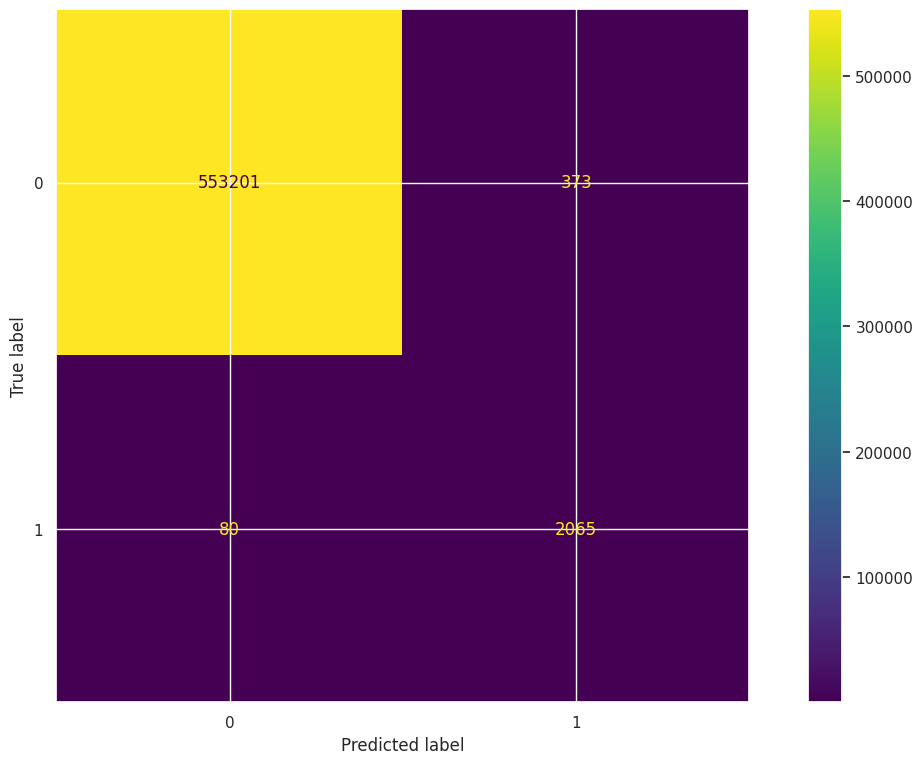

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()